# Week 1 - The What Why and when of Machine Learning
Main idea is to follow that notebook in order to have an initial aproach -  this doesn't means that you only have to answer to the questions or implement code. Feel free to add all the interesting content that you find and take conclusions from the data. Please just use this as a template

# 0. Library import and list input files

In [20]:
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
import seaborn as sns
import sys

#Pandas more columns
pd.options.display.max_columns = None
pd.set_option('display.max_columns', None)

# Add input as import path
sys.path.insert(0,'../input')

# Plot style
plt.style.use('fivethirtyeight')
%matplotlib inline  
# Input data files are available in the "../input/" directory. Only linux
# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))


# 1. Data import and first impressions

### 1.1 Load dataset and have an overview.
Objectives:
* Load the data
* Understand the data

Questions:
* Q1: How many people in your training set have survived the Titanic disaster?
* Q2: How many samples we have?
* Q3: Average age.


In [21]:
# Import the data from the dataset
td = pd.read_csv('../input/train.csv',index_col='id')
ted = pd.read_csv('../input/test.csv',index_col='id')

# ToDO 1: Show the fist n entries of the table
n = random.randint(1,9)
display(td[:n])

# ToDo 2: Rename the attributes with a fancy name
td_tmp = td.rename(columns={'pclass': 'PassengerClass', 'survived': 'Survived',
                        'sex': 'Gender'})
display(td_tmp[:n])

# Todo 3: Questions
print("Q1: ", len(td["survived"] == 1), " survivors in train data")
print("Q2: ", len(td["survived"]), " samples in train data")
print("Q3: ", td["age"].mean(), " is the average age")


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
id,,,,,,,,,,,,
277,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,"Paris, France"
562,2,1,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.3500,NaN,Q,"Halifax, NS"
111,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,"Winnipeg, MB"
930,3,0,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q,NaN
841,3,0,"Hagardon, Miss. Kate",female,17.0,0,0,AQ/3. 30631,7.7333,NaN,Q,NaN
585,2,0,"Weisz, Mr. Leopold",male,27.0,1,0,228414,26.0000,NaN,S,"Bromsgrove, England / Montreal, PQ"
609,3,0,"Adams, Mr. John",male,26.0,0,0,341826,8.0500,NaN,S,"Bournemouth, England"
540,2,1,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S,"Plymouth, Devon / Detroit, MI"
1075,3,0,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.2250,NaN,S,NaN


,PassengerClass,Survived,name,Gender,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
id,,,,,,,,,,,,
277,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,"Paris, France"
562,2,1,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.3500,NaN,Q,"Halifax, NS"
111,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,"Winnipeg, MB"
930,3,0,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q,NaN
841,3,0,"Hagardon, Miss. Kate",female,17.0,0,0,AQ/3. 30631,7.7333,NaN,Q,NaN
585,2,0,"Weisz, Mr. Leopold",male,27.0,1,0,228414,26.0000,NaN,S,"Bromsgrove, England / Montreal, PQ"
609,3,0,"Adams, Mr. John",male,26.0,0,0,341826,8.0500,NaN,S,"Bournemouth, England"
540,2,1,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S,"Plymouth, Devon / Detroit, MI"
1075,3,0,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.2250,NaN,S,NaN


Q1:  654  survivors in train data
Q2:  654  samples in train data
Q3:  29.566276803118907  is the average age


### 1.2 Plot the data
Objectives:

* Divide the features in two categories: numerical and categorical.
* Represent each one of the features with one plot.
* Create a new boolean feature named Child that the defines if the passenger is a kid or not.

Notes:

Try to show multiple plots using the :
```
fig = plt.figure(figsize=(18,18))
sns.distplot(train_data[column].dropna(),ax=plt.subplot(221));
```



#### Numerical
Questions:
* Q1: How many kids survived to the accident?
* Q2: Pclass feature is important?
* Q3: Which is the biggest cabin number?
* Q4: Which is the proportion depending on the Fare of the passengers?

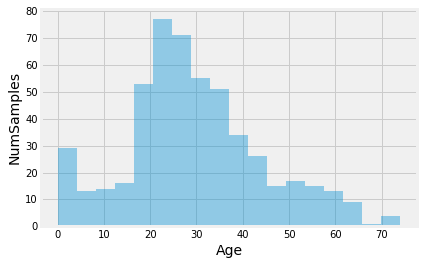

In [22]:
"""Plot Example"""
# Example Survived/Age
sns.distplot(td["age"].dropna(),kde=False);
# X-axis Label
plt.xlabel("Age", fontsize=14);
# Y-axis Label
plt.ylabel("NumSamples", fontsize=14);
# Printing Chart
plt.show()


Q1:  54  kids in the training data
Q2 ----------------------------------
Table with the percentage respect os his own pclass of survived passengers
1    0.647799
2    0.455172
3    0.242857
Name: pclass, dtype: float64
Table with the percentage respect os his own pclass of died passengers
1    0.352201
2    0.544828
3    0.757143
Name: pclass, dtype: float64
Extract conclusions...
---------------------------------- Q2
Q3: Max cabin number is  98
Q4 ----------------------------------


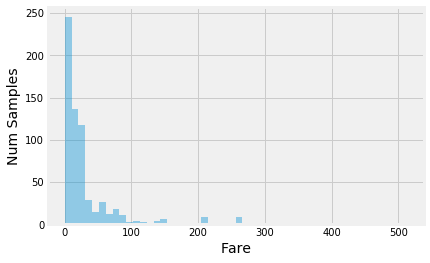

----------------------------------Q4


In [23]:
""" Your work """
"""
Q1: How many kids survived to the accident?
Q2: Pclass feature is important?
Q3: Which is the biggest cabin number?
Q4: Which is the proportion depending on the Fare of the passengers?
"""
# Questions
kids_th = 12
td["kid"] = td["age"] < kids_th
print("Q1: ", td["kid"].sum(), " kids in the training data")
print("Q2 ----------------------------------")
print("Table with the percentage respect os his own pclass of survived passengers")
people_survive = td[td["survived"] == 1]
people_die = td[td["survived"] == 0]
print(people_survive["pclass"].value_counts() / td["pclass"].value_counts())
print("Table with the percentage respect os his own pclass of died passengers")
print(people_die["pclass"].value_counts() / td["pclass"].value_counts())
print("Extract conclusions...")
print("---------------------------------- Q2")

def only_numbers(string):
    return ''.join(c for c in string if c.isdigit())

def filter_cabin(cabin_str):
    cabin_str = str(cabin_str)
    
    # Multiple or single cabin
    n_cabins = len(cabin_str.split(" "))
    if n_cabins == 1:
        return only_numbers(cabin_str)
    else:
        cabins = cabin_str.split(" ")
        cabin_numbers = []
        for cabin in cabins:
            cabin_numbers.append(only_numbers(cabin))
        return max(cabin_numbers)

td["cabin_number"] = td["cabin"].apply(filter_cabin)
# display(td[:4])
print("Q3: Max cabin number is ", td["cabin_number"].max())
print("Q4 ----------------------------------")
# Example Survived/Age
sns.distplot(td["fare"].dropna(),kde=False);
# X-axis Label
plt.xlabel("Fare", fontsize=14);
# Y-axis Label
plt.ylabel("Num Samples", fontsize=14);
# Printing Chart
plt.show()
print("----------------------------------Q4")

#### Categorical
Questions:
* Q1:  How many woman/man died?
* Q2:  Where did the most people embark?
* Q3:  How many johns are in the boat?
* Q4:  How many embarked places exist?
* Q5:  Name repetitions

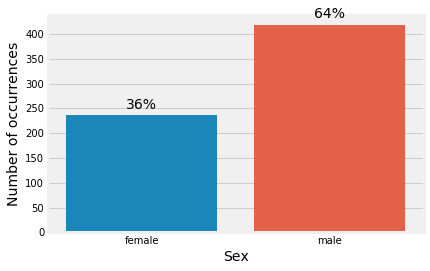

In [24]:
"""Plot Example"""
ax = sns.countplot(x="sex", data=td);
# X-axis Label
plt.xlabel("Sex", fontsize=14);
# Y-axis Label
plt.ylabel('Number of occurrences', fontsize=14)
# Setting Legend location 
# Add percents over bars
# Get heights of our bars
height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax.patches]
# Coun number of bar groups 
ncol = int(len(height)/2)
# Coun total height of groups
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
# Loop through bars
for i, p in enumerate(ax.patches):   
    # Adding percentages   
    ax.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 10,
        '{:1.0%}'.format(height[i]/float(total[i])), ha="center", size=14) 

plt.show()
    

Q3:  24 johns in the boat
Q4:  ['C' 'Q' 'S'] embarking docks
Q5:
william       31
john          24
henry         12
charles       12
thomas        11
james         11
joseph        10
george         9
johan          9
edward         9
karl           8
samuel         8
alexander      8
patrick        7
alfred         7
arthur         7
frederick      6
ellen          6
richard        6
frank          6
nils           5
albert         5
bridget        5
walter         5
ernest         5
martin         5
alice          4
stephen        4
anna           4
harry          4
              ..
artur          1
meier          1
luise          1
salli          1
katriina       1
ortin          1
washington     1
lucien         1
jan            1
ingeborg       1
johannes       1
margit         1
grace          1
catharina      1
lucy           1
virginia       1
mathilde       1
eric           1
countess.      1
nedelio        1
ennis          1
madeleine      1
domingos       1
ilia           1


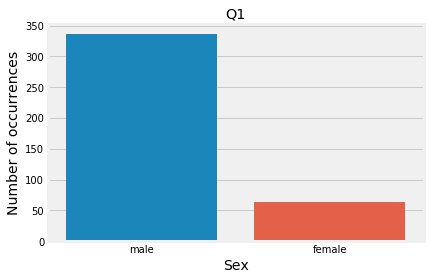

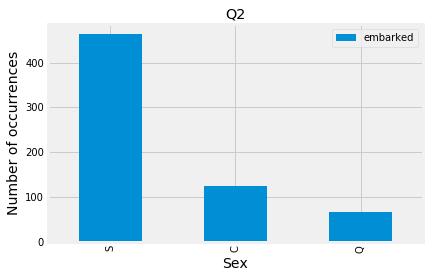

In [25]:
""" Your work """
"""
Q1: How many woman/man died?
Q2: Where did the most people embark?
Q3: How many johns are in the boat?
Q4: How many embarked places exist?
Q5: Name repetitions
"""

died_passengers = td[td["survived"] == 0]
ax = sns.countplot(x="sex", data=died_passengers);
# X-axis Label
plt.xlabel("Sex", fontsize=14);
# Y-axis Label
plt.ylabel('Number of occurrences', fontsize=14)
# Setting Legend location 
plt.title("Q1")

fig1 = plt.figure()
td["embarked"].value_counts().plot(kind="bar")
# X-axis Label
plt.xlabel("Sex", fontsize=14);
# Y-axis Label
plt.ylabel('Number of occurrences', fontsize=14)
# Setting Legend location 
plt.legend(loc=1);
plt.title("Q2")

def filter_name(string):
    strings = string.split(",")
    name = strings[1].split(" ")[2]
    return name.lower()
td["first_name"] = td["name"].apply(filter_name)

print("Q3: ", (td["first_name"] == "john").sum(), "johns in the boat")

print("Q4: ", td["embarked"].dropna().unique(), "embarking docks")

print("Q5:")
print(td["first_name"].value_counts())

### 1.3 Fill missing data
Objectives:
* Think in how to fill missing data
    Ex: Missing Embarked can be filled depending on the Fare?
*  Discuss the importance of fill the missing data


In [26]:
# ToDo 1: Show the missing data for each feature
# train_data.info()

# ToDo 2: Propose at least one method to fill the missing data of one feature
print("Age, embarked and cabin are the features that have more null (NaN) objects")
print("Age:", td["age"].isnull().sum(), "missing values.")
print("Embarked:", td["embarked"].isnull().sum(), "missing values.")
print("Cabin:", td["cabin"].isnull().sum(), "missing values.")

# For the Embarked the most common values is enough
td["embarked"].value_counts().max() == td["embarked"].value_counts()
td["embarked"] = td["embarked"].fillna("S")

# ToDo for get more accuracy...
# For the age multiple aproaches look if it goes alone or not and put the most commom value in a specific range
# For the Cabin look at similar surenames and try to correlate info


Age, embarked and cabin are the features that have more null (NaN) objects
Age: 141 missing values.
Embarked: 1 missing values.
Cabin: 508 missing values.


# 2. First prediction

In [27]:
# ToDo 1: Use the gender feature to classify the test_data
ted["survived"] = 0
ted.loc[ted["fare"] > 9 , "survived"] = 1


In [28]:
from utils import accuracy_score
# Compute the accuracy of your first predicter
print("Current accuracy: %f" % accuracy_score(ted))

Current accuracy: 0.563359
